In [1]:
import re, nltk, spacy, string
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from nltk.tokenize import word_tokenize
import pandas as pd
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
import pyLDAvis
import pyLDAvis.sklearn
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# from pprint import pprint


import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format='retina'

#### Import clean datasets created in Cleaning notebook
And inpsect head

In [2]:
bio_df = pd.read_csv('datasets/bio_clean.csv')
bio_df.head()

,title,class_label
0,multiplex vaccine,0
1,be there a biology equivalent of the american ...,0
2,be in grade ap biology and the online progr...,0
3,virus dna,0
4,help for exam,0


In [3]:
phys_df = pd.read_csv('datasets/phys_clean.csv')
phys_df.head()

,title,class_label
0,re all genius,1
1,what s the space fill with,1
2,restructure of physics undergrad a dialogue,1
3,help please,1
4,think of get a phd in quantum mechanic,1


#### Concatenate biology and physics subreddit data frames
Inspect

In [4]:
sci_df = pd.concat([bio_df, phys_df])
sci_df

,title,class_label
0,multiplex vaccine,0
1,be there a biology equivalent of the american ...,0
2,be in grade ap biology and the online progr...,0
3,virus dna,0
4,help for exam,0
...,...,...
3003,how important be program for physics,1
3004,what be a follow up to stephen hawking a brief...,1
3005,parallel universe,1
3006,what do apply physicist actually do,1


#### Check for balanced classes

In [5]:
sci_df['class_label'].value_counts(normalize=True)

0    0.50322
1    0.49678
Name: class_label, dtype: float64

#### Set X and y values. Train Test Split

Set the target as the `'class_label'` column which labels which subreddit the content is from  
Added `.values.astype('str')` because they were not the right format for CountVectorizer

In [6]:
X = sci_df['title'].values.astype('str')
y = sci_df['class_label'].values.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### Add custom stop words to English set

In [7]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['biology', 'physics', 'question','help', 'need', 
                                               'like', 'look', 'use', 'career', 'work', 'vs', 'know', 
                                               'book', 'science', 'happen', 'job', 'advice', 'school', 
                                               'good', 'just', 'thing', 'way', 'idea', 'long', 'high', 
                                               'student', 'start', 'different', 'problem', 'study', 
                                               'learn', 'textbook', 'understand', 'research', 
                                               'possible', 'want', 'make', 'bio', 'biologist', 'physicist',
                                              'really', 'master', 'degree', '*ology'])

#### Instatiate Count Vectorizer and Tfidf Vectorizers for NLP

In [8]:
cvec = CountVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))
tvec = TfidfVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))

#### Fit and Transform training and testing data for both models

In [9]:
#Count Vectorizer
X_train_cv = cvec.fit_transform(X_train)
X_test_cv = cvec.transform(X_test)

#Tfidf Vectorizer
X_train_tv = tvec.fit_transform(X_train)
X_test_tv = tvec.transform(X_test)

In [10]:
clf = MultinomialNB(alpha=.01)
clf.fit(X_train_cv, y_train)
y_test_cv = cvec.transform(X_test)

y_pred = clf.predict(y_test_cv)


acc_score = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))


Total accuracy classification score: 0.7912813738441216
Total F1 classification score: 0.7906969825828727


In [11]:
# With TV 

clf = MultinomialNB(alpha=.01)
clf.fit(X_train_tv, y_train)
y_test_tv = cvec.transform(X_test)

y_pred = clf.predict(y_test_tv)


acc_score = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.7886393659180978
Total F1 classification score: 0.7878898259968057


#### Store the vectorized data in a dataframe
Inspect Data

In [12]:
X_train_df = pd.DataFrame(X_train_cv.toarray(), columns=cvec.get_feature_names())
X_train_df.head()

,ability,abiotic,able,able live,abroad,absolute,absolute zero,absorb,ac,academia,...,youtube,youtube channel,youtube video,zero,zinc,zone,zoologist,zoology,zoology ecology,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
lir = LinearRegression().fit(X_train_cv, y_train)
lir.score(X_test_cv, y_test)

-1.2795603665638975

#### Instatiate and fit Logistic Regression Model
Using Count Vectorized Data
Evaluate using cross_val_score
C regularization set to 0.4
Best cv value = ~7. Tested 5, 7, 10, 15 

In [14]:
lr = LogisticRegression(C=.4)
lr.fit(X_train_cv, y_train)

print(f'Training Score: {cross_val_score(lr, X_train_cv, y_train, cv=7).mean()}')
print(f'Test Score: {cross_val_score(lr, X_test_cv, y_test, cv=7).mean()}')

Training Score: 0.7870502849316409
Test Score: 0.7377935044985736


#### Create a list of words being analyzed in Phys data set with their corresponding coefficients from logistic regression
Create a table with top 20 coefs
Plot coefs


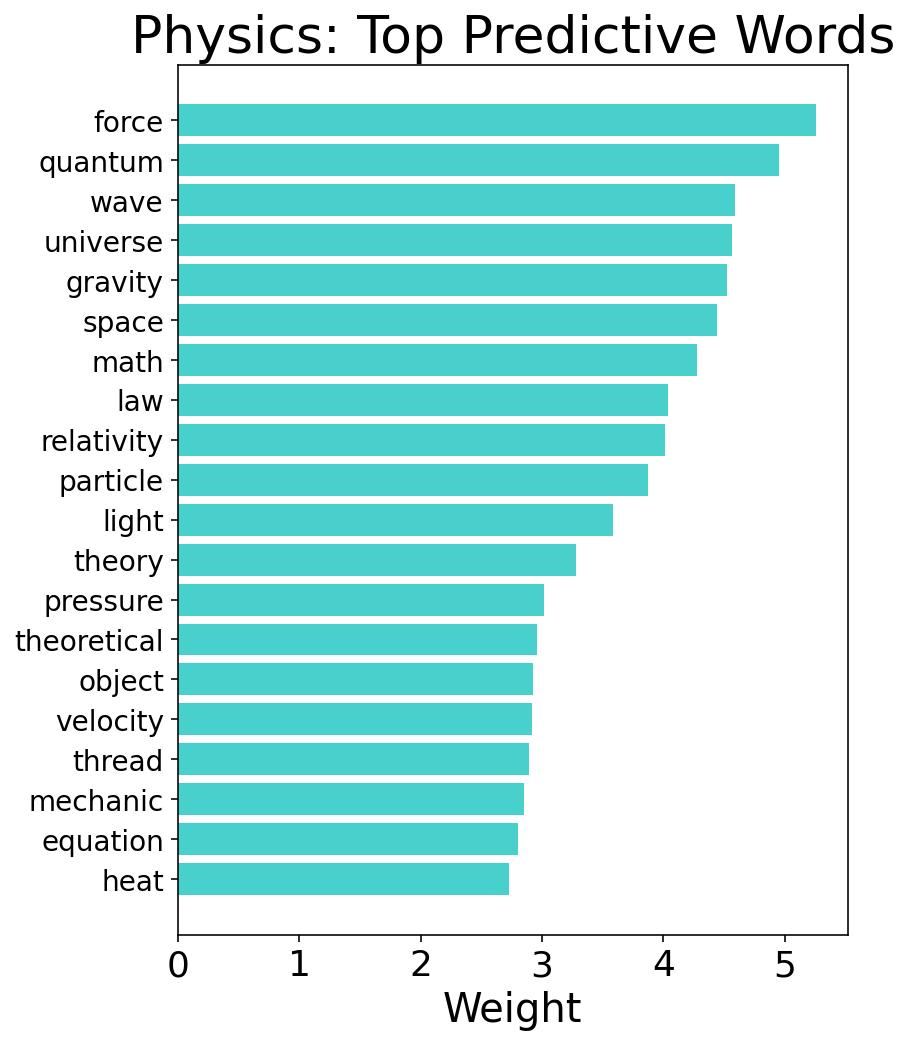

In [15]:
log_coefs = pd.DataFrame(list(zip(X_train_df, np.exp(lr.coef_[0]))))

table = log_coefs.sort_values(1, ascending=False).head(20)

plt.figure(figsize=(6,8))
# Grab physics data
plt.barh(table[0], table[1], color='mediumturquoise')
plt.xlabel('Weight', fontsize=20)
plt.xticks(fontsize=18)
plt.ylim(plt.ylim()[::-1])
plt.yticks(fontsize=14)
plt.title('Physics: Top Predictive Words', fontsize=26);

#### Create a list of words being analyzed in Bio data set with their corresponding coefficients from logistic regression
Create a table with top 20 coefs
Plot coefs

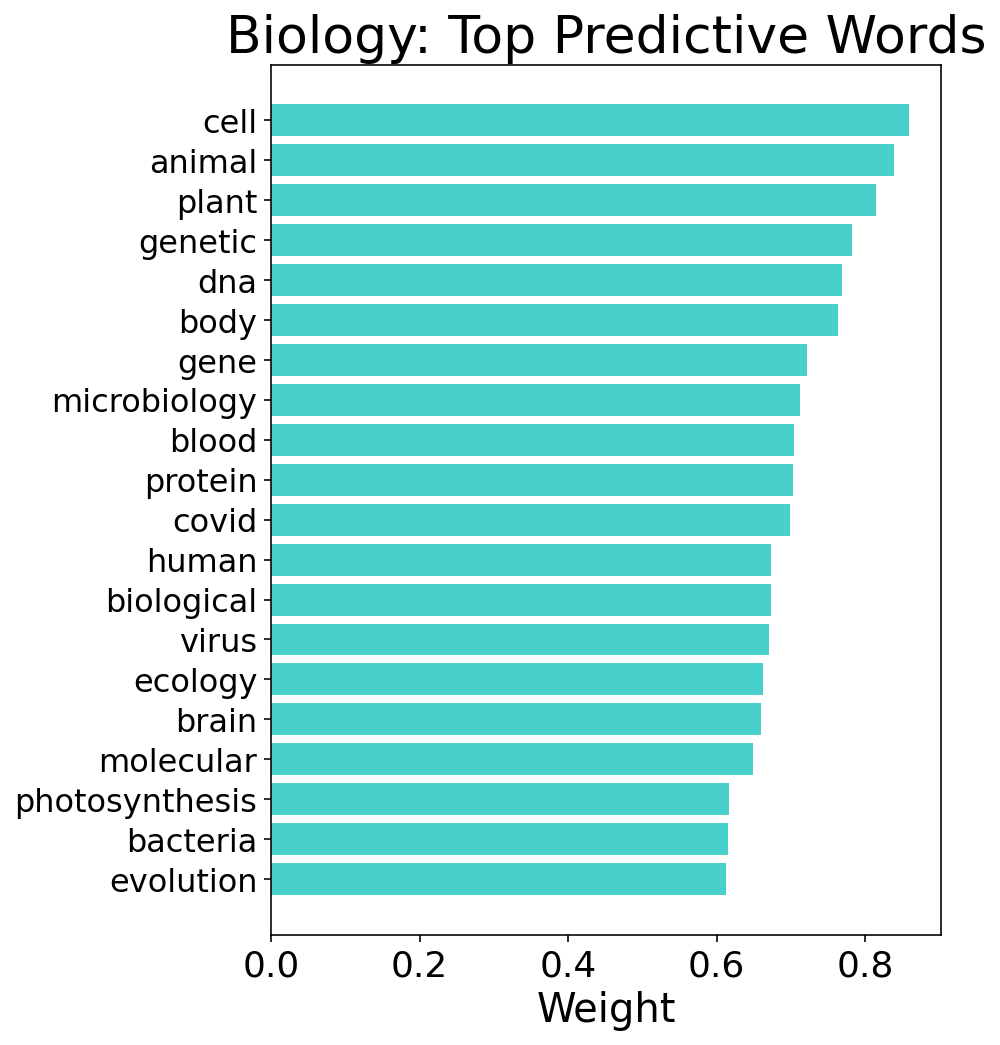

In [16]:
table = log_coefs.sort_values(1).head(20)

plt.figure(figsize=(6,8))
# Grab biology data
plt.barh(table[0], (1 - table[1]), color='mediumturquoise')
plt.ylim(plt.ylim()[::-1])
plt.yticks(fontsize=16)
plt.xlabel('Weight', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Biology: Top Predictive Words', fontsize=26);

# Grid Searching
## CountVectorizer

#### Instatniate a pipeline for model testing
* count vectorizer with the optimal parameters from above
* random forest classifier




In [17]:
pipe = Pipeline([
    ('cvec', CountVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))),
    ('rf', RandomForestClassifier())
])

#### Setup parameters for Grid Searching for CountVectorizer RandomForestClassifier
n_jobs are set for my machine but will be commented out in favor of settings better for the average machine

In [18]:
pipe_params = {
    'rf__min_samples_split': [14, 15, 16],
    'rf__n_jobs': [30, 34, 40] # commented out as this may not apply to other machine specs running this
#     'rf__n_jobs': [10, 12, 16]
}

#### Instantiate Grid Search
Fit data and print scores

In [19]:
%time
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=7)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

CPU times: user 7 µs, sys: 5 µs, total: 12 µs
Wall time: 23.8 µs
0.7630403442550335
{'rf__min_samples_split': 16, 'rf__n_jobs': 40}


## TfidfVectorizer

#### Instatiate pipeline for TfidfVectorizer  and RandomForestClassifier

In [20]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))),
    ('rf', RandomForestClassifier())
])

#### Setup parameters for Grid Searching TfidfVectorizer and RandomForestClassifier
n_jobs are set for my machine but will be commented out in favor of settings better for the average machine

In [21]:
# setting up a parameter grid to search over
pipe_params = {
    # different parameter combinations to search over
    'rf__min_samples_split': [11, 12, 13, 14, 15],
    'rf__n_jobs': [30, 34, 40] # commented out as this only applies for my machine specs
#     'rf__n_jobs': [10, 12, 16]
}

#### Instantiate Grid Search
Fit data and print scores

In [22]:
%time
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=7)
gs.fit(X_train, y_train)

print(gs.best_score_)
gs.best_params_

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 15 µs
0.7652428916553211


{'rf__min_samples_split': 15, 'rf__n_jobs': 34}

#### Instantiate Random Forect Classifier
Fit model
Use optimal parameters from grid search

Print scores

In [23]:
rf = RandomForestClassifier(min_samples_split=15, n_jobs=-1)
rf.fit(X_train_cv, y_train)

print(f'Training Score: {cross_val_score(rf, X_train_cv, y_train, cv=5).mean()}')
print(f'Test Score: {cross_val_score(rf, X_test_cv, y_test, cv=5).mean()}')

Training Score: 0.7703142340665785
Test Score: 0.7199462330338994


## KNN

#### Instatiate pipeline for CountVectorizer  and KNeighborsClassifier

In [24]:
pipe = Pipeline([
    ('cvec', CountVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))),
    ('knn', KNeighborsClassifier())
])

#### Setup parameters for Grid Searching CountVectorizer and KNeighborsClassifier

In [25]:
pipe_params = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13]
}

#### Instantiate Grid Search
Fit data and print scores

In [26]:
%time
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=7)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 14.3 µs
0.65866459863635


{'knn__n_neighbors': 5}

#### Instatiate pipeline for TfidfVectorizer  and KNeighborsClassifier
Set Params

In [27]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_features=5_000, stop_words=my_stop_words, ngram_range=(1,2))),
    ('knn', KNeighborsClassifier())
])

pipe_params = {
    'knn__n_neighbors': [2, 3, 5, 7, 9, 11, 13]
}

In [28]:
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=7)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6461086517583693


{'knn__n_neighbors': 2}

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_cv, y_train)

print(f'Training Score: {cross_val_score(knn, X_train_cv, y_train, cv=7).mean()}')
print(f'Test Score: {cross_val_score(knn, X_test_cv, y_test, cv=7).mean()}')

Training Score: 0.6540353086963256
Test Score: 0.6367858971545608


In [31]:
def get_metrics(y_test, y_pred):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_pred, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_pred, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_pred, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

TypeError: 'numpy.float64' object is not callable

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [ ]:
def get_most_important_features(cvec, model, n=7):
    index_to_word = {v:k for k,v in cvec.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(cvec, clf, 10)
importance[0]['bottom']


In [ ]:
# def show_most_informative_features(cvec, clf, n=20):
#     feature_names = cvec.get_feature_names()
#     coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
#     top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
#     for (coef_1, fn_1), (coef_2, fn_2) in top:
#         print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
# importance = get_most_important_features(cvec, clf, 10)
# print(importance)

In [ ]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.7)
    plt.title('Biology', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.7, color='teal')
    plt.title('Physics', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

In [ ]:
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance") 

In [ ]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_test_tfidf, y_test)
plt.show()

In [ ]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [ ]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

In [ ]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['Irrelevant','Disaster'], normalize=False, title='Confusion matrix')
plt.show()

print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [ ]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

In [ ]:
w2v_model.init_sims(replace=True)

In [ ]:
word2vec_path = sci_df
word2vec = gensim.models.KeyedVectors.load_word2vec_format(sci_df, binary=True)

In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

In [ ]:
def get_word2vec_embeddings(vectors, sci_df, generate_missing=False):
    embeddings = sci_df.apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [ ]:
embeddings = get_word2vec_embeddings(word2vec, sci_df)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                         test_size=0.2, random_state=40)

In [ ]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

In [ ]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [ ]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))